### Problem Statement
     A bank aims to leverage its customer data to enhance decision-making processes by gaining insights into customer demographics, financial behaviors, and engagement trends. By understanding the characteristics and needs of different customer segments, the bank seeks to identify opportunities for improving customer retention, optimizing service offerings, and increasing customer satisfaction.


### Approach
    
     To achieve this, we are going to approach the analysis using the following steps
   - Properly Master The Business And Data
   - Clean And Explore Data For Analysis
   - Using Visualisations To Answer Questions Enabling Us Achieve Our Objective
   - Draw A Conclusion
   - Prepare A Summary


### Objective

    - Demographic Analysis

    - Customer Engagement Patterns

    - Financial Performance

    - Exited Customers Analysis

    - Customer Segmentations

      
      


### Data Mastery

In [156]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import warnings

%matplotlib inline
warnings.filterwarnings("ignore")

In [157]:
# Read in our dataset
customer_df = pd.read_csv('BankData/Customer_Info - Customer_Info.csv')
account_df = pd.read_csv('BankData/Account_Info - Account_Info.csv')

### Data Exploration

In [158]:
customer_df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary
0,15634602,Hargrave,619,FRA,Female,42.0,2,€101348.88
1,15647311,Hill,608,Spain,Female,41.0,1,€112542.58
2,15619304,Onio,502,French,Female,42.0,8,€113931.57
3,15701354,Boni,699,FRA,Female,39.0,1,€93826.63
4,15737888,Mitchell,850,Spain,Female,43.0,2,€79084.1


In [159]:
customer_df.tail()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary
9996,15569892,Johnstone,516,French,Male,35.0,10,€101699.77
9997,15584532,Liu,709,FRA,Female,36.0,7,€42085.58
9998,15682355,Sabbatini,772,Germany,Male,42.0,3,€92888.52
9999,15628319,Walker,792,French,Female,28.0,4,€38190.78
10000,15628319,Walker,792,French,Female,28.0,4,€38190.78


In [160]:
account_df.head()

,CustomerId,Balance,NumOfProducts,HasCrCard,Tenure,IsActiveMember,Exited
0,15634602,€0.0,1,Yes,2,Yes,1
1,15634602,€0.0,1,Yes,2,Yes,1
2,15647311,€83807.86,1,Yes,1,Yes,0
3,15619304,€159660.8,3,No,8,No,1
4,15701354,€0.0,2,No,1,No,0


In [161]:
account_df.tail()

,CustomerId,Balance,NumOfProducts,HasCrCard,Tenure,IsActiveMember,Exited
9997,15569892,€57369.61,1,Yes,10,Yes,0
9998,15584532,€0.0,1,Yes,7,Yes,1
9999,15682355,€75075.31,2,No,3,No,1
10000,15628319,€130142.79,1,No,4,No,0
10001,15628319,€130142.79,1,No,4,No,0


### Data Dictionary
   This ia a dictionary that interpretes each column
| Field                | Description                                                                                     |
|----------------------|-------------------------------------------------------------------------------------------------|
| **CustomerId**       | A unique identifier for each customer                                                           |
| **Surname**          | The customer's last name                                                                        |
| **CreditScore**      | A numerical value representing the customer's credit score                                      |
| **Geography**        | The country where the customer resides (France, Spain, or Germany)                              |
| **Gender**           | The customer's gender (Male or Female)                                                          |
| **Age**              | The customer's age                                                                              |
| **Tenure**           | The number of years the customer has been with the bank                                         |
| **Balance**          | The customer's account balance                                                                  |
| **Number Of Products** | The number of bank products the customer uses (e.g., savings account, credit card)            |
| **Has Credit Card**  | Whether the customer has a credit card (1 = yes, 0 = no)                                        |
| **IsActiveMember**   | Whether the customer is an active member (1 = yes, 0 = no)                                      |
| **EstimatedSalary**  | The estimated salary of the customer                                                            |
| **Exited**           | Whether the customer has churned (1 = yes, 0 = no)                                              |

yes, 0 = no)


In [162]:
# concatenating the data to make it a whole dataset using merge function
data_df = pd.merge(customer_df,account_df, on='CustomerId', how='outer')

data_df.head()

In [163]:
data_df.tail()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure_x,EstimatedSalary,Balance,NumOfProducts,HasCrCard,Tenure_y,IsActiveMember,Exited
9999,15815628,Moysey,711,France,Female,37.0,8,€80215.2,€113899.92,1,No,8,No,0
10000,15815645,Akhtar,481,FRA,Male,37.0,8,€175082.2,€152303.66,2,Yes,8,Yes,0
10001,15815656,Hopkins,541,Germany,Female,39.0,9,€199808.1,€100116.67,1,Yes,9,Yes,1
10002,15815660,Mazzi,758,FRA,Female,34.0,1,€60728.89,€154139.45,1,Yes,1,Yes,0
10003,15815690,Akabueze,614,Spain,Female,40.0,3,€77789.01,€113348.5,1,Yes,3,Yes,0


In [164]:
data_df.info() # This gives us a clear view of our values. The column name,total rows,if column has a null value and their datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10004 entries, 0 to 10003
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10004 non-null  int64  
 1   Surname          10001 non-null  object 
 2   CreditScore      10004 non-null  int64  
 3   Geography        10004 non-null  object 
 4   Gender           10004 non-null  object 
 5   Age              10001 non-null  float64
 6   Tenure_x         10004 non-null  int64  
 7   EstimatedSalary  10004 non-null  object 
 8   Balance          10004 non-null  object 
 9   NumOfProducts    10004 non-null  int64  
 10  HasCrCard        10004 non-null  object 
 11  Tenure_y         10004 non-null  int64  
 12  IsActiveMember   10004 non-null  object 
 13  Exited           10004 non-null  int64  
dtypes: float64(1), int64(6), object(7)
memory usage: 1.1+ MB


In [165]:
data_df.isnull().sum() # This shows the sum of each null values in a column

CustomerId         0
Surname            3
CreditScore        0
Geography          0
Gender             0
Age                3
Tenure_x           0
EstimatedSalary    0
Balance            0
NumOfProducts      0
HasCrCard          0
Tenure_y           0
IsActiveMember     0
Exited             0
dtype: int64

In [166]:
data_df.isnull().sum() / len(data_df) * 100 # This returns the significant sum of null values in percentage

CustomerId         0.000000
Surname            0.029988
CreditScore        0.000000
Geography          0.000000
Gender             0.000000
Age                0.029988
Tenure_x           0.000000
EstimatedSalary    0.000000
Balance            0.000000
NumOfProducts      0.000000
HasCrCard          0.000000
Tenure_y           0.000000
IsActiveMember     0.000000
Exited             0.000000
dtype: float64

In [167]:
data_df.columns # This returns all the columns headers in the dataset

Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure_x', 'EstimatedSalary', 'Balance', 'NumOfProducts', 'HasCrCard',
       'Tenure_y', 'IsActiveMember', 'Exited'],
      dtype='object')

In [168]:
data_df.shape # This shows how many rows and column we have in our dataset

(10004, 14)

In [169]:
data_df.duplicated().sum() # This returns the sum of duplicated rows 

4

In [171]:
# removing duplicates
data_df = data_df.drop_duplicates(subset=['CustomerId'])

In [172]:
data_df.duplicated().sum()

0

In [173]:
data_df.describe() # This returns the statistics of the data

,CustomerId,CreditScore,Age,Tenure_x,NumOfProducts,Tenure_y,Exited
count,1.000000e+04,10000.000000,9997.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.922077,5.012800,1.530200,5.012800,0.203700
std,7.193619e+04,96.653299,10.489072,2.892174,0.581654,2.892174,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,1.000000,0.000000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,1.000000,3.000000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,1.000000,5.000000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,2.000000,7.000000,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,4.000000,10.000000,1.000000


## Observations
- We noticed surname and age has null values
- We need to rename Geography for easy understanding and also FRA and French to France
- Remove characters in Balance and Estimated Salary
- We would change the datatypes for Age, Balance and Estimated Salary
- We have 2 tenure columns, 1 will be dropped 

### Data Cleaning

In [174]:
# Before we alter our data we must make a copy
data_copy = data_df.copy()

In [175]:
# removing our rows with null values
data_df.dropna(subset=['Surname', 'Age'], axis=0, inplace=True)

In [176]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9997 entries, 0 to 10003
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       9997 non-null   int64  
 1   Surname          9997 non-null   object 
 2   CreditScore      9997 non-null   int64  
 3   Geography        9997 non-null   object 
 4   Gender           9997 non-null   object 
 5   Age              9997 non-null   float64
 6   Tenure_x         9997 non-null   int64  
 7   EstimatedSalary  9997 non-null   object 
 8   Balance          9997 non-null   object 
 9   NumOfProducts    9997 non-null   int64  
 10  HasCrCard        9997 non-null   object 
 11  Tenure_y         9997 non-null   int64  
 12  IsActiveMember   9997 non-null   object 
 13  Exited           9997 non-null   int64  
dtypes: float64(1), int64(6), object(7)
memory usage: 1.1+ MB


In [177]:
# Renaming our column geography to location
data_df.rename(columns = {'Geography' : 'Location'}, inplace = True)

In [180]:
data_df.columns

Index(['CustomerId', 'Surname', 'CreditScore', 'Location', 'Gender', 'Age',
       'Tenure_x', 'EstimatedSalary', 'Balance', 'NumOfProducts', 'HasCrCard',
       'Tenure_y', 'IsActiveMember', 'Exited'],
      dtype='object')

In [178]:
data_df['Location'] = data_df['Location'].replace({'FRA' : 'France'})

In [179]:
data_df['Location'] = data_df['Location'].replace({'French' : 'France'})

In [235]:
data_df.head(20)

,CustomerId,Surname,CreditScore,Location,Gender,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited,Age Group,HasCreditCard,IsActivemember
0,15565701,Ferri,698,Spain,Female,39,9,90212.38,161993.89,1,No,No,0,36-40,0,0
1,15565706,Akobundu,612,Spain,Male,35,1,83256.26,0.00,1,Yes,Yes,1,36-40,1,1
2,15565714,Cattaneo,601,France,Male,47,1,96517.97,64430.06,2,Yes,Yes,0,46-50,1,1
3,15565779,Kent,627,Germany,Female,30,6,188258.49,57809.32,1,No,No,0,31-35,0,0
4,15565796,Docherty,745,Germany,Male,48,10,74510.65,96048.55,1,No,No,0,46-50,0,0
5,15565806,Toosey,532,France,Male,38,9,30583.95,0.00,2,No,No,0,36-40,0,0
6,15565878,Bates,631,Spain,Male,29,3,197963.46,0.00,2,Yes,Yes,0,26-30,1,1
7,15565879,Riley,845,France,Female,28,9,56185.98,0.00,2,Yes,Yes,0,26-30,1,1
8,15565891,Dipietro,709,France,Male,39,8,56214.09,0.00,2,No,No,0,36-40,0,0
9,15565996,Arnold,653,France,Male,44,8,154639.72,0.00,2,Yes,Yes,0,41-45,1,1


In [181]:
# Removing the currency symbol to enable us change the datatype to float
data_df['Balance'] = data_df['Balance'].str.replace("€","")

In [182]:
data_df['EstimatedSalary'] = data_df['EstimatedSalary'].str.replace("€","")

In [183]:
data_df.head(20)

,CustomerId,Surname,CreditScore,Location,Gender,Age,Tenure_x,EstimatedSalary,Balance,NumOfProducts,HasCrCard,Tenure_y,IsActiveMember,Exited
0,15565701,Ferri,698,Spain,Female,39.0,9,90212.38,161993.89,1,No,9,No,0
1,15565706,Akobundu,612,Spain,Male,35.0,1,83256.26,0.0,1,Yes,1,Yes,1
2,15565714,Cattaneo,601,France,Male,47.0,1,96517.97,64430.06,2,Yes,1,Yes,0
3,15565779,Kent,627,Germany,Female,30.0,6,188258.49,57809.32,1,No,6,No,0
4,15565796,Docherty,745,Germany,Male,48.0,10,74510.65,96048.55,1,No,10,No,0
5,15565806,Toosey,532,France,Male,38.0,9,30583.95,0.0,2,No,9,No,0
6,15565878,Bates,631,Spain,Male,29.0,3,197963.46,0.0,2,Yes,3,Yes,0
7,15565879,Riley,845,France,Female,28.0,9,56185.98,0.0,2,Yes,9,Yes,0
8,15565891,Dipietro,709,France,Male,39.0,8,56214.09,0.0,2,No,8,No,0
9,15565996,Arnold,653,France,Male,44.0,8,154639.72,0.0,2,Yes,8,Yes,0


In [236]:
data_df.tail(20)

,CustomerId,Surname,CreditScore,Location,Gender,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited,Age Group,HasCreditCard,IsActivemember
9984,15815259,Fang,835,France,Female,56,2,39820.13,0.00,2,Yes,Yes,0,56-60,1,1
9985,15815271,Ritchie,755,Germany,Male,43,6,16929.41,165048.50,3,No,No,1,41-45,0,0
9986,15815295,John,662,France,Female,38,2,120259.41,96479.81,1,No,No,0,36-40,0,0
9987,15815316,Kennedy,644,France,Male,50,9,196371.13,76817.00,4,No,No,1,51-55,0,0
9988,15815364,Ashley,736,Spain,Female,28,2,117431.10,0.00,2,Yes,Yes,0,26-30,1,1
9989,15815420,McDaniels,808,Spain,Male,47,8,74028.36,139196.00,1,Yes,Yes,0,46-50,1,1
9990,15815428,Biryukova,823,France,Male,34,3,9217.92,105057.33,1,No,No,0,31-35,0,0
9991,15815443,Lo,527,Spain,Female,46,10,54947.51,131414.76,1,No,No,0,46-50,0,0
9992,15815490,Cocci,670,Germany,Male,40,2,177028.00,164948.98,3,No,No,1,41-45,0,0
9993,15815530,Chin,612,France,Female,42,10,149682.78,75497.51,1,No,No,0,41-45,0,0


In [185]:
# Converting our datatype using the astype function
data_df['Age'] = data_df['Age'].astype('int')
data_df['Balance'] = data_df['Balance'].astype('float')
data_df['EstimatedSalary'] = data_df['EstimatedSalary'].astype('float')

In [186]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9997 entries, 0 to 10003
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       9997 non-null   int64  
 1   Surname          9997 non-null   object 
 2   CreditScore      9997 non-null   int64  
 3   Location         9997 non-null   object 
 4   Gender           9997 non-null   object 
 5   Age              9997 non-null   int32  
 6   Tenure_x         9997 non-null   int64  
 7   EstimatedSalary  9997 non-null   float64
 8   Balance          9997 non-null   float64
 9   NumOfProducts    9997 non-null   int64  
 10  HasCrCard        9997 non-null   object 
 11  Tenure_y         9997 non-null   int64  
 12  IsActiveMember   9997 non-null   object 
 13  Exited           9997 non-null   int64  
dtypes: float64(2), int32(1), int64(6), object(5)
memory usage: 1.1+ MB


In [187]:
# Droping one of the tenure columns
data_df.drop('Tenure_y', axis=1, inplace=True)

In [188]:
data_df.head()

,CustomerId,Surname,CreditScore,Location,Gender,Age,Tenure_x,EstimatedSalary,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
0,15565701,Ferri,698,Spain,Female,39,9,90212.38,161993.89,1,No,No,0
1,15565706,Akobundu,612,Spain,Male,35,1,83256.26,0.00,1,Yes,Yes,1
2,15565714,Cattaneo,601,France,Male,47,1,96517.97,64430.06,2,Yes,Yes,0
3,15565779,Kent,627,Germany,Female,30,6,188258.49,57809.32,1,No,No,0
4,15565796,Docherty,745,Germany,Male,48,10,74510.65,96048.55,1,No,No,0


In [189]:
# Renaming the tenure column
data_df.rename(columns = {'Tenure_x' : 'Tenure'}, inplace = True)

In [190]:
data_df.columns

Index(['CustomerId', 'Surname', 'CreditScore', 'Location', 'Gender', 'Age',
       'Tenure', 'EstimatedSalary', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'Exited'],
      dtype='object')

### Data Analysis


In [191]:
# In order to visualize the count of category columns we need to get all the coulmns
cat_columns = [i for i in data_df.select_dtypes('object')]

In [192]:
# These are all the categorical columns in our dataset
cat_columns

['Surname', 'Location', 'Gender', 'HasCrCard', 'IsActiveMember']

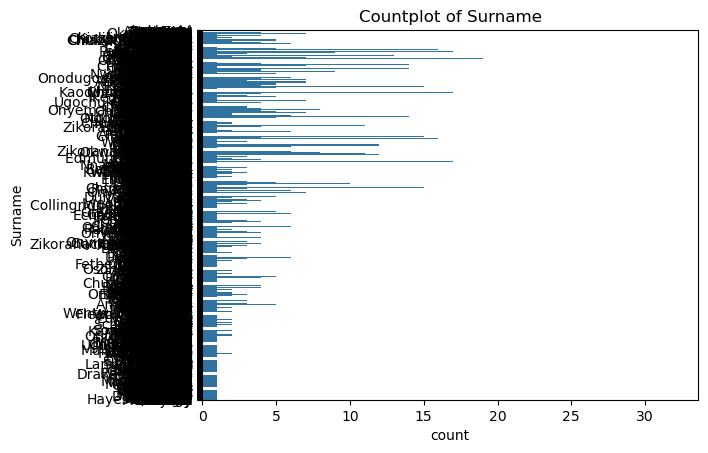

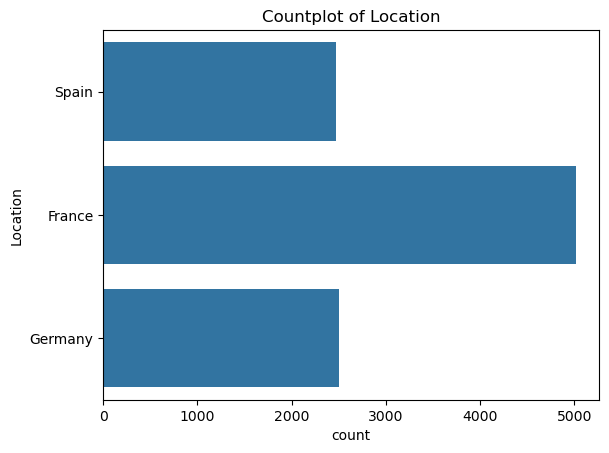

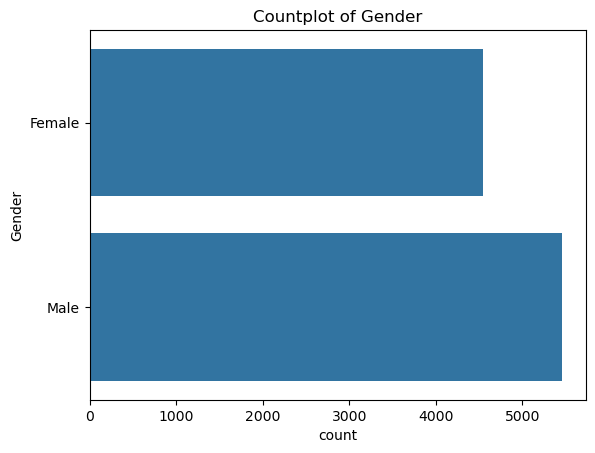

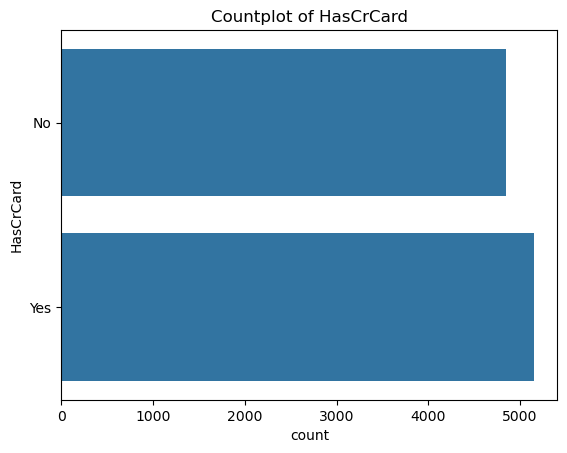

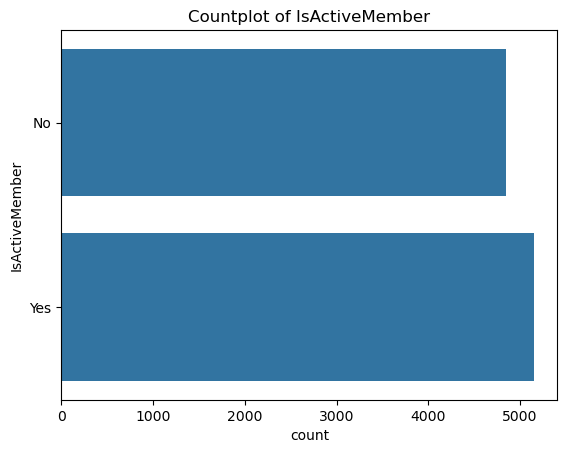

In [193]:
# Using the categorical column to plot a seaborn count plot
for col in cat_columns:
    sb.countplot(y=col,data=data_df)
    plt.title(f'Countplot of {col}')
    plt.show()

#### Observations
- Courtesy of the huge data, the name plot is compacted
- France has the highest count in location
-  In gender count male surpasses the female
-  Most of the customers have credit cards
-  Most customers are active

In [194]:
# Would love to visualize our numerical columns 
num_columns = [i for i in data_df.select_dtypes('int','float')]

In [195]:
# This are the numerical columns in our dataset
num_columns

['CustomerId', 'CreditScore', 'Age', 'Tenure', 'NumOfProducts', 'Exited']

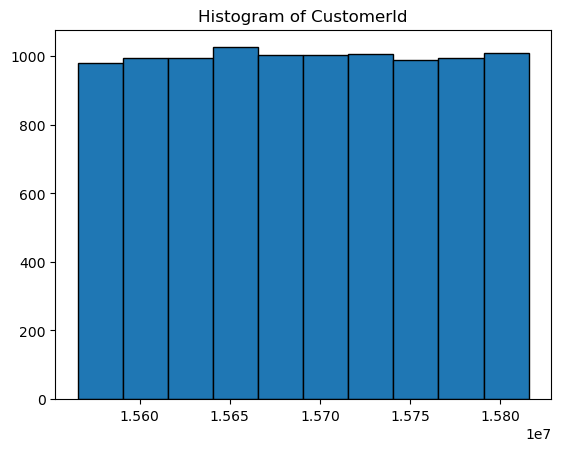

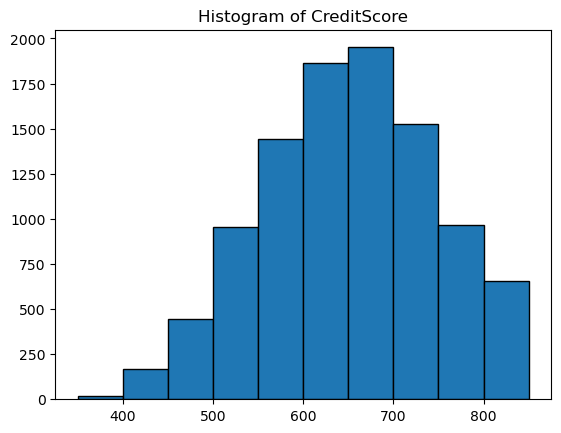

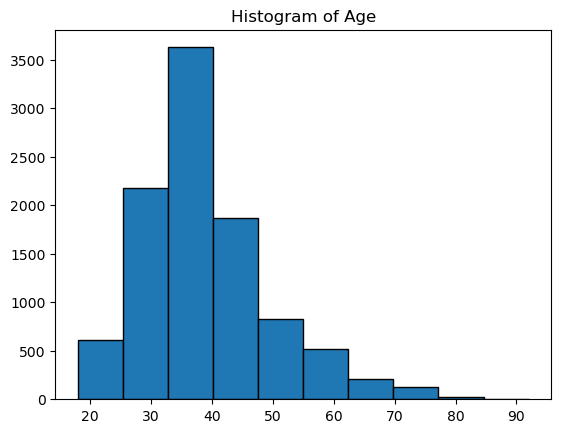

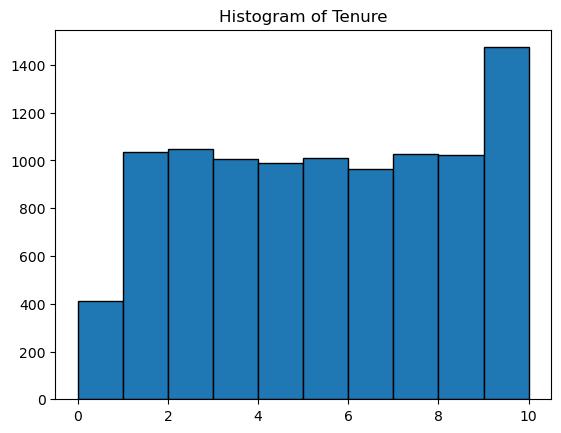

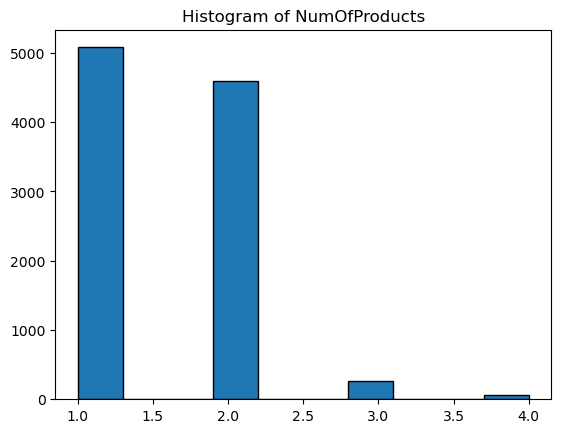

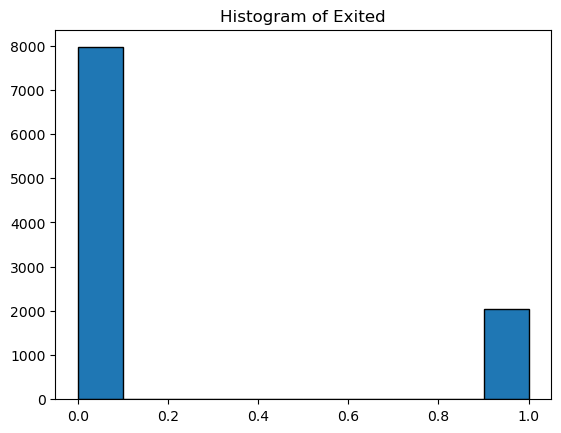

In [196]:
# Plotting our historical graph to visual each columns 
for col in num_columns:
    plt.hist(data_df[col], edgecolor='black')
    plt.title(f'Histogram of {col}')
    plt.show()
    

#### Observations
- CustomerId is showing a close margin distribution
- the highest in credit score is within 650 to 700
- The highest age range is 30 to 40
- The longest tenure is 9 to 10
- Age, Exited, NumofProducts and Tenure show a distribution that is indicating there is an outliers 

#### Demographic Analysis

1.    Analyze the distribution of customers based on geography, gender, and age

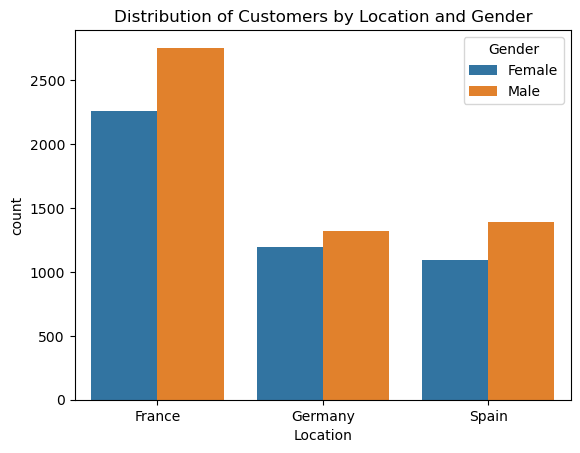

In [197]:
# Plot count of customers by geography and gender
sb.countplot(data=data_df, x="Location", hue="Gender", order = data_df['Location'].value_counts().index)
plt.title("Distribution of Customers by Location and Gender")
plt.show()

#### Results
- Germany have the most female customers, while Spain ranked high in the male category

- Least in male is Germany

- Least in female category is Spain

In [198]:
# grouping our customers distribution by aggregating them, using the count of age for each location and gender

cust_dist = data_df.groupby(['Location', 'Gender'], as_index=False)[['Age']].count().sort_values(by='Age', ascending=False)
cust_dist

,Location,Gender,Age
1,France,Male,2753
0,France,Female,2260
5,Spain,Male,1387
3,Germany,Male,1316
2,Germany,Female,1192
4,Spain,Female,1089


Text(0.5, 1.0, 'Average age of customers based on location and gender')

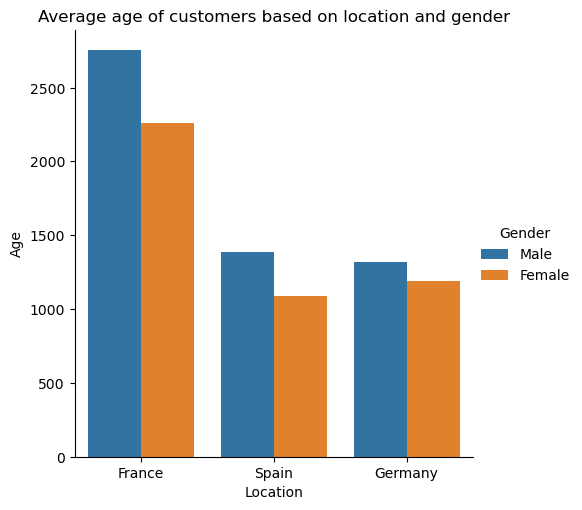

In [199]:
# Ploting a catplot to visualise the average age of each customer
sb.catplot(x='Location', y='Age', hue='Gender', kind='bar', data=cust_dist)
plt.title('Average age of customers based on location and gender')

#### Results
- Spain ranked high in the male category also it has the most age count

- FRA has the least in male and female gender also in age count
  
- Most of the customers are male gender

In [200]:
# Grouping our customer by location
cust_dist_by_location = data_df.groupby('Location')[['CustomerId']].count().sort_values(by='CustomerId', ascending=False)
cust_dist_by_location

,CustomerId
Location,
France,5013
Germany,2508
Spain,2476


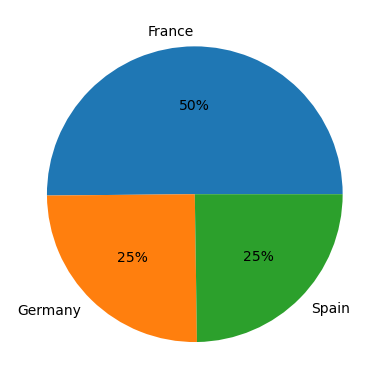

In [201]:
plt.pie(cust_dist_by_location['CustomerId'], labels=cust_dist_by_location.index, autopct='%.0f%%')
plt.show()

In [202]:
# customer distribution by gender
cust_dist_by_gender = data_df.groupby('Gender')[['CustomerId']].count().sort_values(by='CustomerId', ascending=False)
cust_dist_by_gender

,CustomerId
Gender,
Male,5456
Female,4541


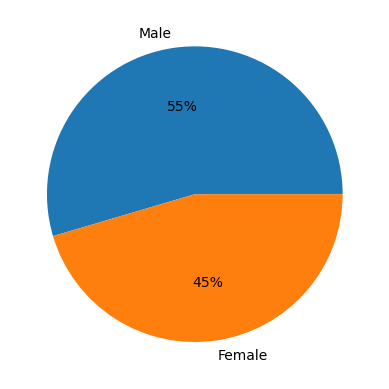

In [203]:
plt.pie(cust_dist_by_gender['CustomerId'], labels=cust_dist_by_gender.index, autopct='%.0f%%')
plt.show()

In [204]:
# Distributing our customers age into groups, to enable us get the highest age range
# Define age bins and labels
bins = [0, 20, 25, 30, 35, 40, 45, 50, 55, 60, 100]
labels = ['0-20', '21-25', '26-30', '31-35', '36-40', '41-45', '46-50', '51-55', '56-60', '61+']

# Create an 'Age Group' column based on age bins
data_df['Age Group'] = pd.cut(data_df['Age'], bins=bins, labels=labels, right=False)

# Group by 'Age Group' and count the number of customers in each group
age_distribution = data_df.groupby('Age Group')[['CustomerId']].count()
# Display the distribution
age_distribution


,CustomerId
Age Group,
0-20,49
21-25,408
26-30,1184
31-35,2037
36-40,2307
41-45,1672
46-50,945
51-55,513
56-60,356


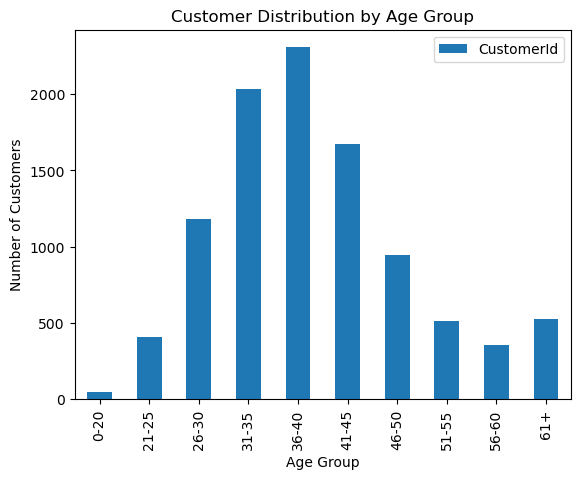

In [205]:
# plotting a distribution graph to see our highest age range
age_distribution.plot(kind='bar')
plt.title('Customer Distribution by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Customers')
plt.show()


### Results
- the most appearing age range of our customer are 36 to 40

- the least is below 20

2.  Identify any demographic segments (e.g., by geography or gender) that have a significantly different credit score, balance, or other financial metrics.    


In [206]:
# Group by Gender and Geography, then calculate average CreditScore and Balance
demographic_analysis = data_df.groupby('Location').agg({
    'CreditScore': 'mean',
    'Balance': 'mean'
})

# Display the result
demographic_analysis

,CreditScore,Balance
Location,,
France,649.690604,62105.022839
Germany,651.484450,119721.495993
Spain,651.324717,61794.571321


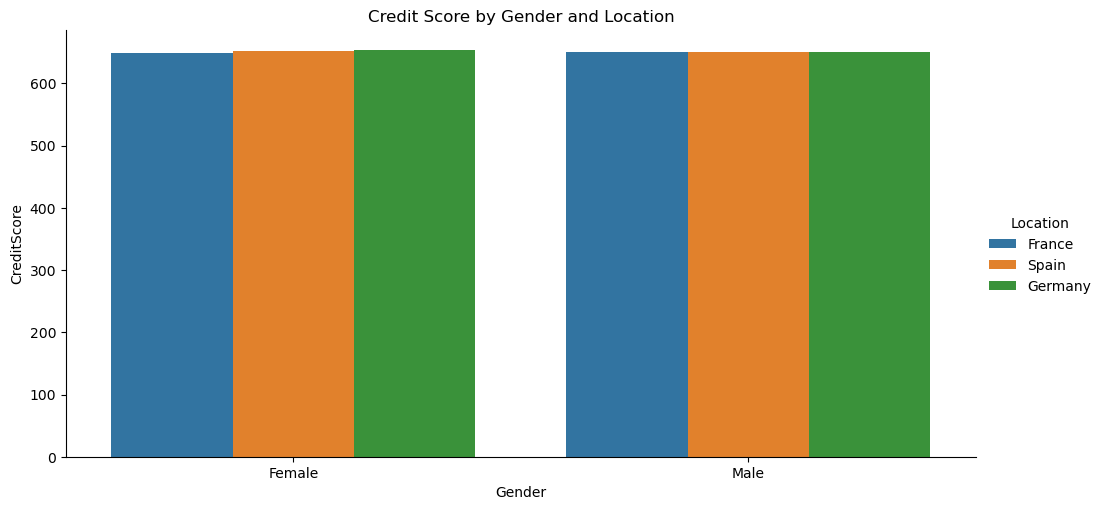

In [207]:
# Boxplot for credit score by location
sb.catplot(x='Gender', y='CreditScore', hue='Location', kind='bar', ci = None, data=data_df.sort_values(by='CreditScore'), height=5, aspect=2)
plt.title('Credit Score by Gender and Location')
plt.show()


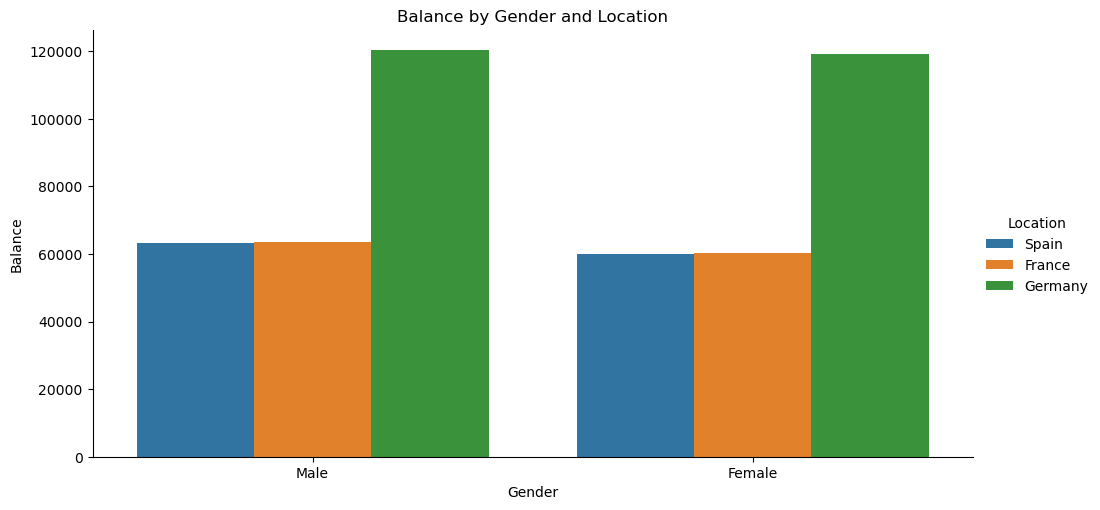

In [208]:
sb.catplot(x='Gender', y='Balance', hue='Location', kind='bar',ci = None, data=data_df.sort_values(by='Balance'), height=5, aspect=2)
plt.title('Balance by Gender and Location')
plt.show()


#### Customer Engagement Patterns

In [209]:

def categorize_HasCrCard(value):
    if value == 'Yes':
        return '1'
    else:
        return '0'
    
data_df['HasCreditCard'] = data_df['HasCrCard'].apply(categorize_HasCrCard)


In [210]:
def categorize_Is_ActiveMember(value):
    if value == 'Yes':
        return '1'
    else:
        return '0'
    
data_df['IsActivemember'] = data_df['IsActiveMember'].apply(categorize_Is_ActiveMember)


In [211]:
data_df.head()

,CustomerId,Surname,CreditScore,Location,Gender,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited,Age Group,HasCreditCard,IsActivemember
0,15565701,Ferri,698,Spain,Female,39,9,90212.38,161993.89,1,No,No,0,36-40,0,0
1,15565706,Akobundu,612,Spain,Male,35,1,83256.26,0.00,1,Yes,Yes,1,36-40,1,1
2,15565714,Cattaneo,601,France,Male,47,1,96517.97,64430.06,2,Yes,Yes,0,46-50,1,1
3,15565779,Kent,627,Germany,Female,30,6,188258.49,57809.32,1,No,No,0,31-35,0,0
4,15565796,Docherty,745,Germany,Male,48,10,74510.65,96048.55,1,No,No,0,46-50,0,0


In [212]:
data_df['HasCreditCard'] = data_df['HasCreditCard'].astype('int')
data_df['IsActivemember'] = data_df['IsActivemember'].astype('int')

In [213]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9997 entries, 0 to 10003
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   CustomerId       9997 non-null   int64   
 1   Surname          9997 non-null   object  
 2   CreditScore      9997 non-null   int64   
 3   Location         9997 non-null   object  
 4   Gender           9997 non-null   object  
 5   Age              9997 non-null   int32   
 6   Tenure           9997 non-null   int64   
 7   EstimatedSalary  9997 non-null   float64 
 8   Balance          9997 non-null   float64 
 9   NumOfProducts    9997 non-null   int64   
 10  HasCrCard        9997 non-null   object  
 11  IsActiveMember   9997 non-null   object  
 12  Exited           9997 non-null   int64   
 13  Age Group        9997 non-null   category
 14  HasCreditCard    9997 non-null   int32   
 15  IsActivemember   9997 non-null   int32   
dtypes: category(1), float64(2), int32(3), int64(5)

In [214]:

# Group by Tenure and calculate average engagement metrics
tenure_engagement = data_df.groupby('Tenure').agg({
    'NumOfProducts': 'mean',
    'HasCreditCard': 'mean',
    'IsActivemember': 'mean'
})

# Display the result
tenure_engagement


,NumOfProducts,HasCreditCard,IsActivemember
Tenure,,,
0,1.443099,0.530266,0.530266
1,1.489855,0.549758,0.549758
2,1.590258,0.533906,0.533906
3,1.533730,0.518849,0.518849
4,1.516684,0.505561,0.505561
5,1.554348,0.500000,0.500000
6,1.519669,0.516563,0.516563
7,1.530156,0.520428,0.520428
8,1.522927,0.506341,0.506341


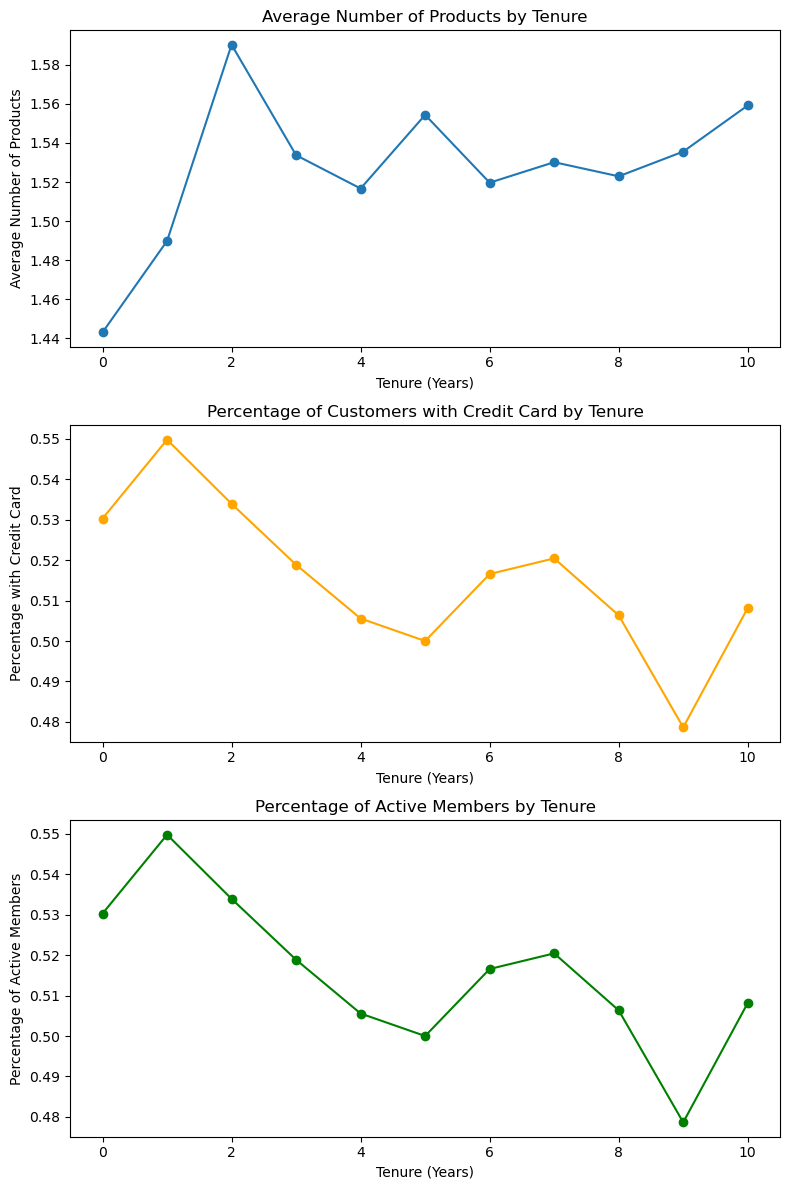

In [215]:
# Plot the results
fig, axs = plt.subplots(3, 1, figsize=(8, 12))

# Number of Products by Tenure
axs[0].plot(tenure_engagement.index, tenure_engagement['NumOfProducts'], marker='o')
axs[0].set_title('Average Number of Products by Tenure')
axs[0].set_xlabel('Tenure (Years)')
axs[0].set_ylabel('Average Number of Products')

# HasCreditCard by Tenure
axs[1].plot(tenure_engagement.index, tenure_engagement['HasCreditCard'], marker='o', color='orange')
axs[1].set_title('Percentage of Customers with Credit Card by Tenure')
axs[1].set_xlabel('Tenure (Years)')
axs[1].set_ylabel('Percentage with Credit Card')

# IsActiveMember by Tenure
axs[2].plot(tenure_engagement.index, tenure_engagement['IsActivemember'], marker='o', color='green')
axs[2].set_title('Percentage of Active Members by Tenure')
axs[2].set_xlabel('Tenure (Years)')
axs[2].set_ylabel('Percentage of Active Members')

plt.tight_layout()
plt.show()


- 

2. Analyze the impact of tenure on customer behavior, especially focusing on long-term customer patterns (e.g., do longer-tenured customers tend to hold more products or have higher balances?).

In [216]:
# Group by tenure and calculate average values
tenure_analysis = data_df.groupby('Tenure').agg({
    'NumOfProducts': 'mean',
    'Balance': 'mean'
})

# Display the result
tenure_analysis

,NumOfProducts,Balance
Tenure,,
0,1.443099,79878.910630
1,1.489855,78555.384222
2,1.590258,76913.016753
3,1.533730,77604.883919
4,1.516684,74059.394065
5,1.554348,76444.280860
6,1.519669,74356.541522
7,1.530156,75551.634426
8,1.522927,77936.598254


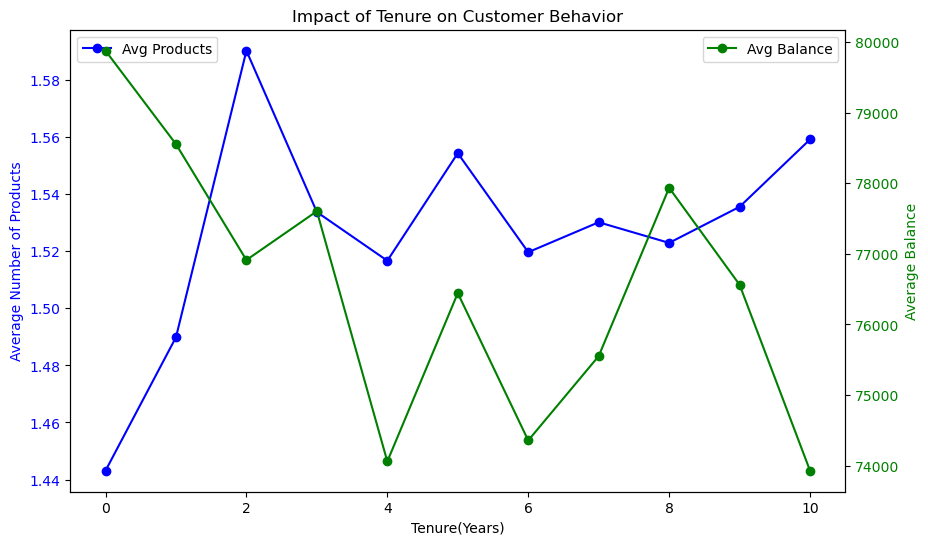

In [217]:
# Plotting the impact of tenure on customer behavior
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot for Number of Products by Tenure
ax1.set_xlabel('Tenure(Years)')
ax1.set_ylabel('Average Number of Products', color='blue')
ax1.plot(tenure_analysis.index, tenure_analysis['NumOfProducts'], marker='o', color='blue', label="Avg Products")
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second y-axis to plot Balance
ax2 = ax1.twinx()
ax2.set_ylabel('Average Balance', color='green')
ax2.plot(tenure_analysis.index, tenure_analysis['Balance'], marker='o', color='green', label="Avg Balance")
ax2.tick_params(axis='y', labelcolor='green')

# Titles and Legends
plt.title('Impact of Tenure on Customer Behavior')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()


- the average product plot suggests that longer-tenured customers are likely more engaged or have more trust for the bank.

-  the average balance plot ndicate that longer-tenured customers do not tend to retain more funds 

#### Financial Performance

   Explore credit score distribution and identify which customer segments (e.g., age, gender, geography) tend to have higher or lower credit scores.


In [218]:
# Average CreditScore distribution by gender for each customer
creditscore_by_gender = data_df.groupby('Gender')[['CreditScore']].mean().sort_values(by='CreditScore', ascending=False)
creditscore_by_gender

,CreditScore
Gender,
Female,650.873156
Male,650.272544


- The average creditscore for each customer in the male and female category are equal

In [219]:
# creditscore distribution by gender
creditscore_by_gender = data_df.groupby('Gender')[['CreditScore']].sum().sort_values(by='CreditScore', ascending=False)
creditscore_by_gender

,CreditScore
Gender,
Male,3547887
Female,2955615


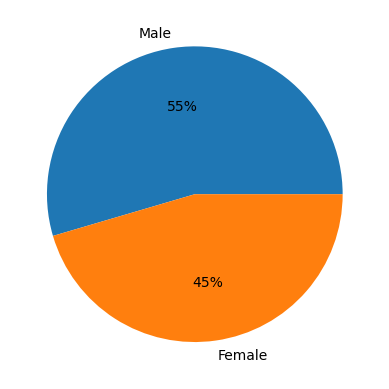

In [220]:
plt.pie(creditscore_by_gender['CreditScore'], labels=creditscore_by_gender.index, autopct='%.0f%%')
plt.show()

- the male gender has higher credit scores

- the female customer has the lowest credit scores

In [221]:
# Average Creditscore distribution by location for each customer
creditscore_by_location = data_df.groupby('Location')[['CreditScore']].mean().sort_values(by='CreditScore', ascending=False)
creditscore_by_location

,CreditScore
Location,
Germany,651.484450
Spain,651.324717
France,649.690604


- French has lowest average creditscore for each customer

- Germany, Spain, FRA are the highest with little or no margin

In [222]:
# creditscore distribution by location
creditscore_by_location = data_df.groupby('Location')[['CreditScore']].sum().sort_values(by='CreditScore', ascending=False)
creditscore_by_location

,CreditScore
Location,
France,3256899
Germany,1633923
Spain,1612680


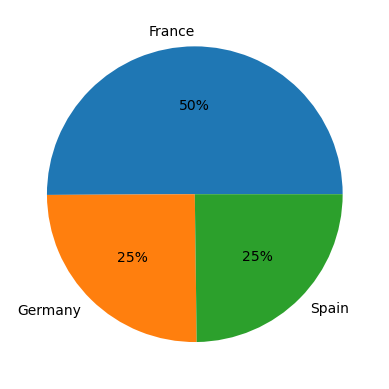

In [223]:
plt.pie(creditscore_by_location['CreditScore'], labels=creditscore_by_location.index, autopct='%.0f%%')
plt.show()

-  Spain and Germany covers 50% of the customer creditscore 

In [224]:
# Creditscore distribution by age
creditscore_by_age = data_df.groupby('Age Group')[['CreditScore']].sum()
creditscore_by_age

,CreditScore
Age Group,
0-20,33079
21-25,265787
26-30,769656
31-35,1328383
36-40,1502474
41-45,1087395
46-50,611284
51-55,330283
56-60,231400


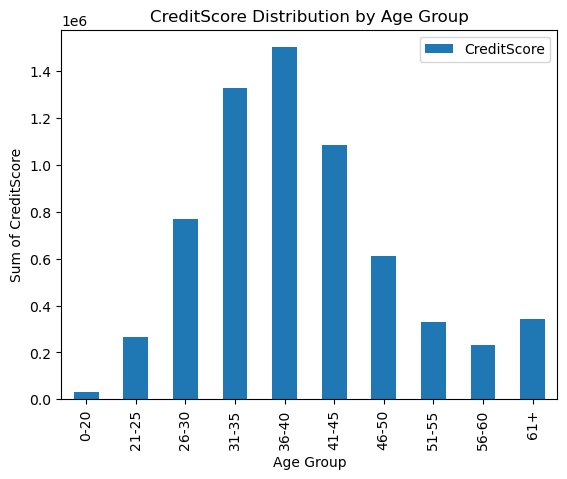

In [225]:
creditscore_by_age.plot(kind='bar')
plt.title('CreditScore Distribution by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Sum of CreditScore')
plt.show()

2. Analyze customer balance and estimated salary patterns and compare them across different demographic groups

In [226]:
# Group by demographics (Gender and AgeGroup) and calculate average Balance and EstimatedSalary
demographic_analysis = data_df.groupby(['Gender', 'Age Group','Location']).agg({
    'Balance': 'mean',
    'EstimatedSalary': 'mean'
})
# Display the result
demographic_analysis


Balance  EstimatedSalary
Gender Age Group Location                                
Female 0-20      France     55821.460000     70126.164000
                 Germany   111221.623333    113945.470000
                 Spain          0.000000    122570.640000
       21-25     France     68142.581961    104403.380196
                 Germany   112453.828056     99851.399167
                 Spain      65105.052308    100649.474808
       26-30     France     57602.883436    100327.759725
                 Germany   118897.783876     96400.963953
                 Spain      60962.986535    101133.597559
       31-35     France     60116.169079    103607.132313
                 Germany   116197.033641    110424.363883
                 Spain      51851.026683     97567.051457
       36-40     France     64249.714283     93218.481552
                 Germany   121591.209116    100252.781325
                 Spain      55400.957510     94485.337866
       41-45     France     59533.482392    103412.592043
                 Germany   117380.261090    102560.955118
                 Spain      60659.645739    105085.427273
       46-50     France     52508.354231    105018.648510
                 Germany   120472.966218    107415.401731
                 Spain      69195.161951    107566.148374
       51-55     France     62094.877500     96437.534519
                 Germany   119715.795823     92511.109747
                 Spain      72097.527358    108989.768868
       56-60     France     56298.011857     93335.974000
                 Germany   124097.946935     99188.595968
                 Spain      66834.858302     89489.440377
       61+       France     61766.596515     91896.730758
                 Germany   121049.456897    100668.149655
                 Spain      62289.042941    113938.410196
Male   0-20      France     72700.020588     80705.996471
                 Germany   124440.583750     94655.806250
                 Spain      42494.287273    100216.360909
       21-25     France     59231.981150    108977.876814
                 Germany   120819.046957    105706.504783
                 Spain      60127.703559    101687.067966
       26-30     France     60450.122544    102768.301864
                 Germany   122356.917959     99233.925850
                 Spain      58226.110395     95658.827566
       31-35     France     63398.613296     97908.584016
                 Germany   120688.908594     93511.818359
                 Spain      63247.950880     99904.747077
       36-40     France     62692.650231     98644.185864
                 Germany   118324.004790    104838.911853
                 Spain      65934.996188     94288.182293
       41-45     France     65824.464417    101465.127152
                 Germany   119883.275292    100072.769667
                 Spain      62286.363568    104072.466828
       46-50     France     65721.914769    104881.200139
                 Germany   122069.016591    104754.841970
                 Spain      62938.580636    101473.298727
       51-55     France     71620.416615    104489.260692
                 Germany   118617.582706     99689.936941
                 Spain      63007.789194    100504.093548
       56-60     France     65844.729103     90714.738718
                 Germany   123645.552353     94784.801961
                 Spain      71948.053571     87623.273810
       61+       France     58679.635282     96310.508239
                 Germany   118638.702769     95264.065077
                 Spain      65727.732308     98326.288333

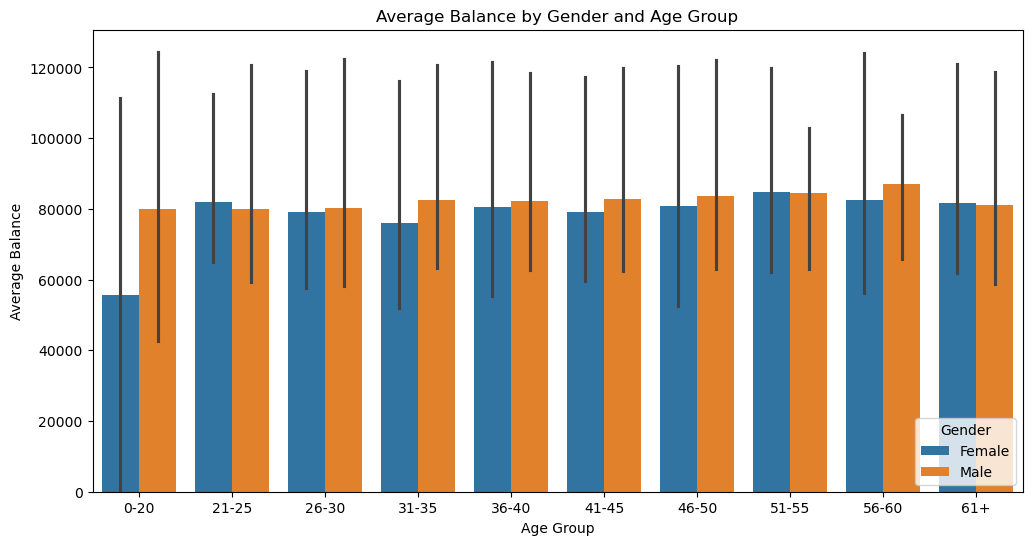

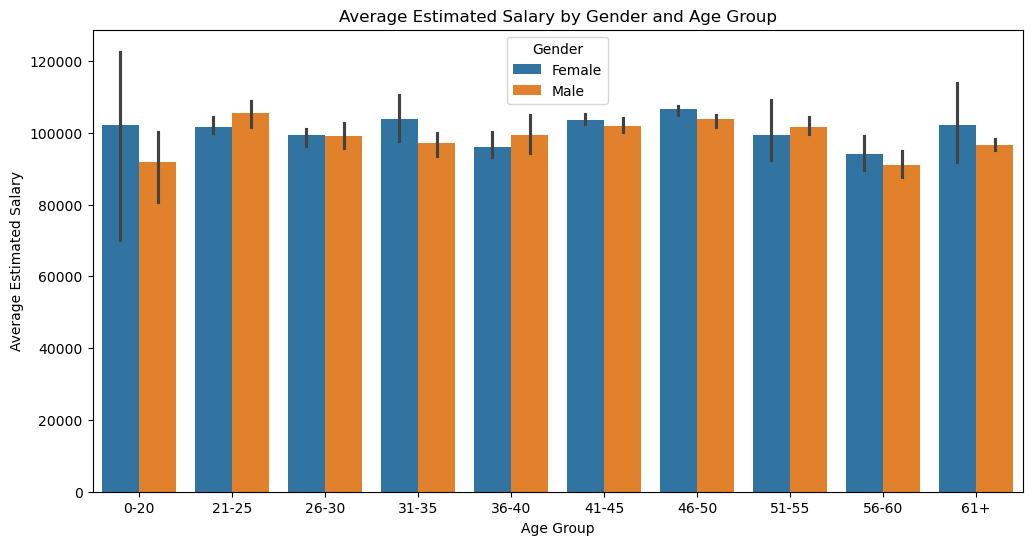

In [227]:
# Visualization

# Clustered bar chart for Balance by Gender and Age Group
plt.figure(figsize=(12, 6))
sb.barplot(data=demographic_analysis, x='Age Group', y='Balance', hue='Gender')
plt.title('Average Balance by Gender and Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Balance')
plt.legend(title='Gender')
plt.show()

# Clustered bar chart for Estimated Salary by Gender and Age Group
plt.figure(figsize=(12, 6))
sb.barplot(data=demographic_analysis, x='Age Group', y='EstimatedSalary', hue='Gender')
plt.title('Average Estimated Salary by Gender and Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Estimated Salary')
plt.legend(title='Gender')
plt.show()


- Under 20 female customer has the least balance

- male category exceeds the female gender across all age range in Balance

- The male gender in the under 20 agegroup has the least estimated Salary

- The male gender in the under 25 agegroup has the most estimated Salary

- There is a decrease in estimated salary from age 50 and above in the male and female gender, while in Balance the decline started from 60 above

- there is a peak in balance in the male in the age group

- in the estimated salary the female gender has more rise than the male


In [228]:
# Group by demographics (Gender and AgeGroup) and calculate average Balance and EstimatedSalary
demography_analysis = data_df.groupby(['Gender','Location']).agg({
    'Balance': 'mean',
    'EstimatedSalary': 'mean'
})
# Display the result
demography_analysis


Balance  EstimatedSalary
Gender Location                                
Female France     60349.361606     99572.851743
       Germany   119127.339404    102448.319253
       Spain      59862.092534    100734.107475
Male   France     63546.284875    100174.252495
       Germany   120259.668222     99905.033959
       Spain      63311.852790     98424.458219

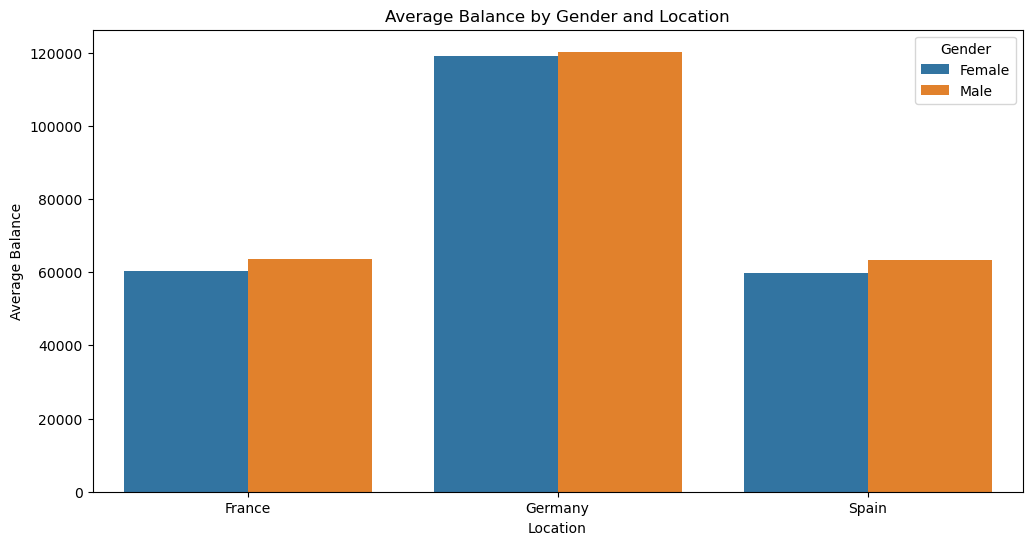

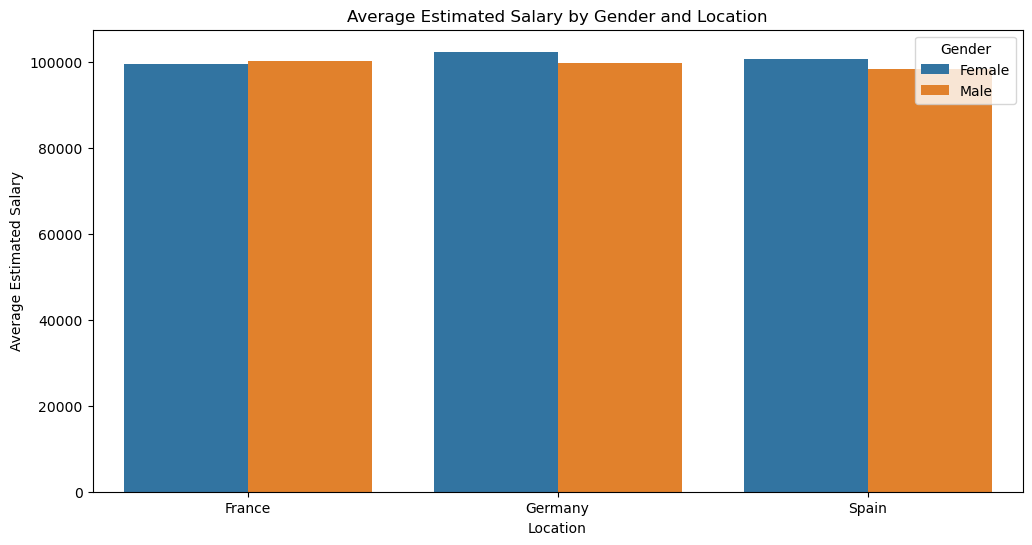

In [229]:

plt.figure(figsize=(12, 6))
sb.barplot(data=demography_analysis, x='Location', y='Balance', hue='Gender')
plt.title('Average Balance by Gender and Location')
plt.xlabel('Location')
plt.ylabel('Average Balance')
plt.legend(title='Gender')
plt.show()



plt.figure(figsize=(12, 6))
sb.barplot(data=demography_analysis, x='Location', y='EstimatedSalary', hue='Gender')
plt.title('Average Estimated Salary by Gender and Location')
plt.xlabel('Location')
plt.ylabel('Average Estimated Salary')
plt.legend(title='Gender')
plt.show()

In [230]:
# Separate data into Exited and Active groups
active_customers = data_df[data_df['Exited'] == 0]
exited_customers = data_df[data_df['Exited'] == 1]

# Calculate average statistics for each group
summary_stats = data_df.groupby('Exited').agg({
    'Age': 'mean',
    'Balance': 'mean',
    'EstimatedSalary': 'mean',
    'CreditScore': 'mean',
    'NumOfProducts': 'mean'
})

summary_stats


,Age,Balance,EstimatedSalary,CreditScore,NumOfProducts
Exited,,,,,
0,37.408166,72739.856206,99740.749342,651.874497,1.544472
1,44.837997,91108.539337,101465.677531,645.351497,1.475209


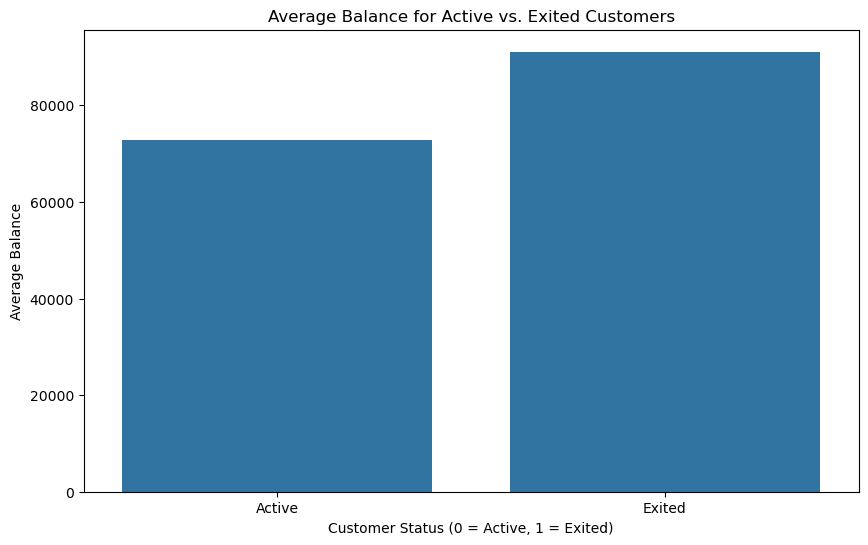

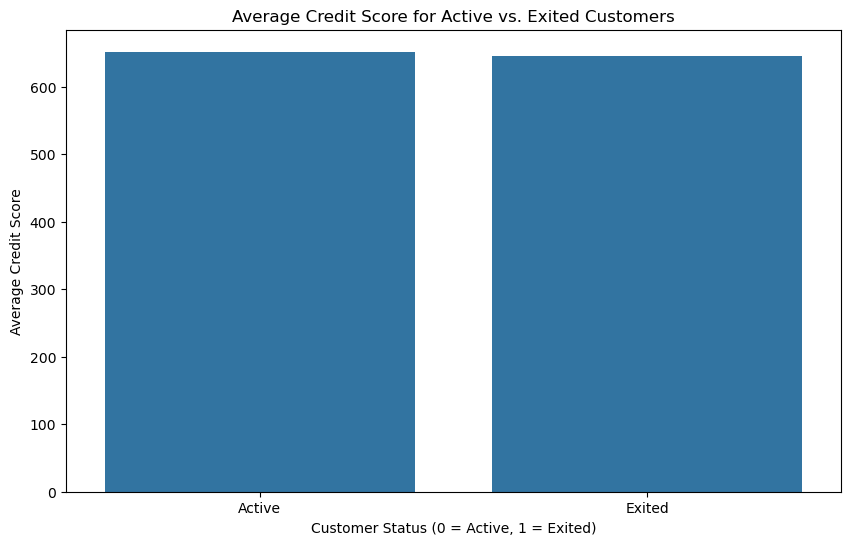

In [231]:

# Visualization

# Compare average Balance by Customer Status
plt.figure(figsize=(10, 6))
sb.barplot(data=data_df, x='Exited', y='Balance', ci=None)
plt.title('Average Balance for Active vs. Exited Customers')
plt.xlabel('Customer Status (0 = Active, 1 = Exited)')
plt.ylabel('Average Balance')
plt.xticks([0, 1], ['Active', 'Exited'])
plt.show()

# Compare average Credit Score by Customer Status
plt.figure(figsize=(10, 6))
sb.barplot(data=data_df, x='Exited', y='CreditScore', ci=None)
plt.title('Average Credit Score for Active vs. Exited Customers')
plt.xlabel('Customer Status (0 = Active, 1 = Exited)')
plt.ylabel('Average Credit Score')
plt.xticks([0, 1], ['Active', 'Exited'])
plt.show()


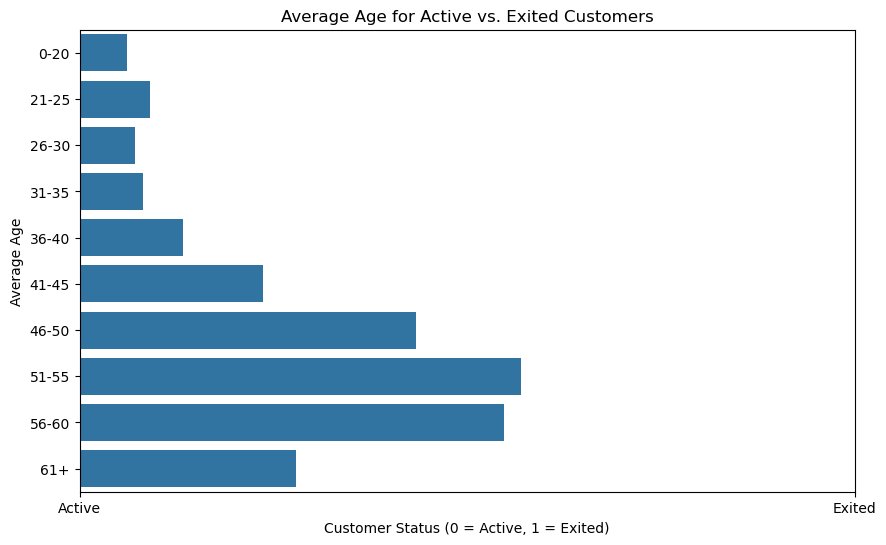

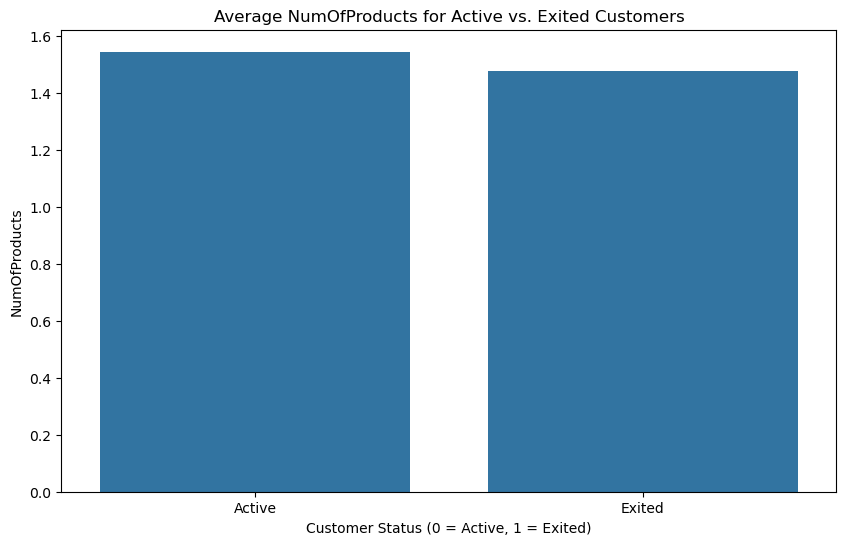

In [232]:
plt.figure(figsize=(10, 6))
sb.barplot(data=data_df, x='Exited', y='Age Group', ci=None)
plt.title('Average Age for Active vs. Exited Customers')
plt.xlabel('Customer Status (0 = Active, 1 = Exited)')
plt.ylabel('Average Age')
plt.xticks([0, 1], ['Active', 'Exited'])
plt.show()

plt.figure(figsize=(10, 6))
sb.barplot(data=data_df, x='Exited', y='NumOfProducts', ci=None)
plt.title('Average NumOfProducts for Active vs. Exited Customers')
plt.xlabel('Customer Status (0 = Active, 1 = Exited)')
plt.ylabel('NumOfProducts')
plt.xticks([0, 1], ['Active', 'Exited'])
plt.show()

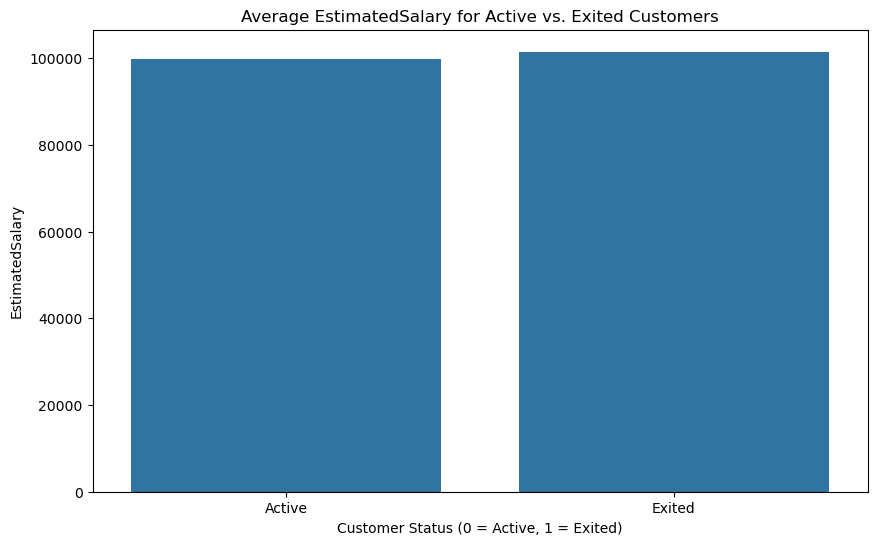

In [233]:
plt.figure(figsize=(10, 6))
sb.barplot(data=data_df, x='Exited', y='EstimatedSalary', ci=None)
plt.title('Average EstimatedSalary for Active vs. Exited Customers')
plt.xlabel('Customer Status (0 = Active, 1 = Exited)')
plt.ylabel('EstimatedSalary')
plt.xticks([0, 1], ['Active', 'Exited'])
plt.show()

#### Conclusions


- Germany has the highest count in location- - 
In gender count male surpasses the fema e- 
Most of the customers have credit c- d- s
Most customers aret
- ive We segmented customers by age groups to understand the distribution across the age spectrum. This approach allowed us to examine the typical age profile of our customer base, which can guide targeted marketing strategies.

Demographic Segmentation and Financial Metrics: By analyzing demographic segments such as gender and geography, we observed how different groups vary in financial metrics like credit scores and balances. For example, examining average balances and credit scores across gender or location highlights if specific demographics are more financially engaged or creditworthy.

Customer Tenure and Engagement: To understand the impact of customer tenure, we investigated how long-term customers behave compared to newer ones. This included examining the average number of products held, credit card ownership, and activity levels over time. Longer-tenured customers showed tendencies to engage with more products, potentially signaling deeper loyalty and value.

Clustered Bar Charts for Key Metrics: For a clear visual comparison, we used clustered bar charts to illustrate variations in balance, salary, and other metrics across demographics. By clustering data points by tenure or age group and gender, we highlighted specific patterns that may influence customer engagement and retention.

Characteristics of Exited vs. Active Customers: Analyzing and comparing customers who exited the bank with those who remained active revealed differences in financial and demographic characteristics. Key metrics, such as balance, credit score, and product ownership, showed trends that could be associated with retention rates. For example, lower balances and credit scores may correlate with higher exit rates, indicating areas for targeted intervention.

Statistical Testing for Significance: To ensure observed differences were statistically meaningful, we applied t-tests, helping confirm that variations across customer groups (such as in balance or tenure) are significant rather than random. Such insights support data-driven decisions for customer retention strategies.

Key Takeaways:
Financial Metrics: Customers with higher balances and credit scores are more likely to remain active, suggesting a need to engage lower-balance customers to reduce churn.
Engagement: Tenure and engagement metrics, such as the number of products owned, reveal that long-term customers tend to engage more deeply, presenting an opportunity to boost retention by promoting product bundling.
Demographic Insights: Patterns by gender, age, and location offer insights into tailored marketing approaches, indicating which groups might benefit from targeted offers or engagement strategies.